<a href="https://colab.research.google.com/github/siposroland/cvs_hw_3d/blob/master/CVS_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computer Vision Systems Homework**

Hi all!

In the spirit of #StayAtHome I tried to assemble a homework project without leaving the house. So, if this looks a little DIY, that's why. So without further ado:

## **Welcome to Cactusville!**

Cactusville is a small town populated by - you guessed correcty - cacti. Since it is a rapidly developing village, they are considering to use self-driving vehicles in their hometown. Your job as a computer vision maestro is to develop the required detection methods.

## The setting

Cactusville is quite unique in the sense that the entire surface of the town is covered in blue tablecloth. The exact colour and pattern of the cloth may vary slightly.

By-and large there are 3 different objects of interest:

* **Cacti:** These are the inhabitants of the village, so self-driving cars must be able to detect them to avoid hitting a cactus. Cacti have four basic sub-types: ***Happy***, ***Sad***, ***Angry*** and ***Evil***
* **Vehicles:** These are other vechiles you should also avoid colliding with. There are 3 vehicles in Cactusville: An ***SUV***, a ***truck***, and an ***airplane***.
* **Traffic Signs:** There are several signs placed all around the town, often multiple ones on a single stand. There are 55 different traffic sign classes, which are not listed here for the sake of brevity.

## Tasks

The people of Cactusville provided 4 videos for you to develop your algorithms with. Each video consists of several RGB and corresponding depth frames, which are found in the '*rgb*' and '*depth*' subfolders of the video. They are ordered numerically. The depth image is a single-channel, 16-bit image, where the pixel value is the distance of that pixel from the camera in **mm**.

The videos also contain a **calibration.yaml** file, which contains the intrinsic parameters of the camera. These are the same for all videos used, so feel free to hardcode the important values into your program.

Your team has to complete the following tasks:

1.   **Traditional Vision:** Create an algorithm to accurately detect and classify the 3 objects of interest (Cactus, Vehicle, Traffic Sign). You don't have to determine the subclass at this point.
2.   **Deep Learning:** Use a deep learning algorithm to classify traffic signs. The package provided includes a training and validation database of 32x32 RGB images.
3.   **3D Vision:** Determine the 3D positions of the object of interest relative to the camera. Use the center of an object's bounding box to determine the position on the image.

## Hardcore Tasks

There are also 3 hardcore tasks for those who like challenges. These aren't particularly difficult, but they take more work and require you to go a little bit beyond the scope of the practicals.

1.   **Traditional Vision:** Determine the subclasses of Cacti and Vehicles
2.   **Deep Learning:** Of the 55 possible traffic signs, 3 are missing from the training and test datasets. ('*X - Priority*', '*X - Turn left*', '*X - Turn right*') As a result, the neural net trained in task 2 will not be able to classify them properly. Extend your neural network to classify these as well.
3.   **3D Vision:** Determine the absolute pose (4x4 transformation matrix) of the camera as it moves throughout the video. You can safely assume that the pose in the first frame of every video is the identity matrix.

## Evaluation and Score

The basic package also contains annotations (correct answers) in the file **annotations.pickle** and a small python script **evaluate.py** you can use to measure the performance of your algorithm. 

Your homework score will be computed using the same script, albeit on 2 secret videos that you were not provided. The reason for this is to make sure that your algorithm works in new situations as well. The secret videos use the same 2 tablecloths and 3 vehicles, but the traffic signs and the cacti may be different. Not to mention the illumination.

The tasks will be evaluated using the following metrics:

* Task 1 - **Average Precision** (AP): This metric is simply the average of **Recall** (nCorrect / nObject) and **Precision** (nCorrect / nPrediction).
* Tasks 1 HC, 2 and 2 HC - **Classification accuracy**
* Tasks 3 and 3 HC - **RBF error**: This is simple the squared error between the prediction and the correct answer transformed by an RBF (Radial Basis Function) kernel. This means that a perfect answer has a score of 1, a bad answer will result in a score close to 0.

### **Answer format**

The evaluation function takes a single argument: A dictionary that containes your predictions. On the top level this dictionary should look like this:

```python
myAnswers = {
    'video1/rgb/1.jpg' : <<Predictions for the image>>,
    'video1/rgb/2.jpg' : <<Predictions for the image>>,
    ...
    'video4/rgb/10.jpg' : <<Predictions for the image>>,
}
```
It is important that the dictionary key contains the video path, since two videos might have image files with the same name. Also, include all images from all videos in the file (even if you have no predictions), since the evaluation function will look for them! The order of the images does not matter.

A prediction for a single image should also be a dictionary with the following format:
```python
myPred = {
    'poses' : [t_11, t12_, t_13, t_14, ..., t_33, t_34],
    'objects' : [obj_1, obj_2, ... obj_n]
}
```
The key `poses` contains the first three rows of the transformation matrix (the fourth row is always `[0 0 0 1]`). The key `objects` is a list, each element containing a single object prediction. The order of predictions does not matter. A single object prediction is also a list, containing the following elements:
```python
myObjects = [u, v, w, h, classInd, subClassInd, x, y, z]
```

* `(u, v)` are the center coordinates of the object's bounding box, while `(w, h)` are the width and height parameters. All four are expected in pixels @640x480 resolution.
* `(x, y, z)` are the 3D coordinates of the object relative to the camera. They are expected in **meters**.
* `classInd` is the index of the object class in the list `className` (see below). It is between 0 and 2.
* `subClassInd` is the index of the subclass in the appropriate list in `subclassNames` (again, see below). It is between [0-54] for traffic signs, [0-2] for vehicles and [0-3] for cacti.

## Rules

Here are some important rules and guidelines you have to follow:

*   This work is to be done in groups of 3 or 4 people. You can do it with less if you feel confident, but not more.
*   Forming/finding a group is your job. Once you have one, 1 person from the group shold write me a message on teams with the names and neptun codes of the members.
*   If you can't find a group by Sunday, write me and I'll formulate groups with the remaining people.
*   The deadline for the submission is Friday midnight on the 14th week. You can make a late submission until the next Sunday midnight.
*   You can opt out of the homework. In this case you will beed to take the midterm exam. This will be done via teams video chat (oral exam). If you want to take this option, write me a message by Sunday.
*   To pass the homework, you will have to submit a working solution for the 3 basic tasks. The quality of your predictions has to be significantly better than what is achievable by random guessing.

### Offered final grade

To qualify for the offered final grade (and to skip the exams), you have to complete at least one of the hardcore tasks. What this final grade will be depends on the quality of the predictions. 

I cannot specify the criteria exactly at this time, since I don't know how easy/hard this homework is yet. I will, however adhere to the following guidelines:

*   I'm planning to offer Good (4) and Excellent (5) final grades.
*   Those, who completed all 3 hardcore tasks with high quality are gonna get a 5
*   Those, who completed at least 2 hardcore tasks with high quality are gonna get **at least** a 4
*   'High quality' is undefined to create a situation in which teams compete
*   Also, I want to avoid two situations: a., where the criterion is so hard that only a few people manage to get an offered grade; and b., where it is so easy that everyone gets one.
*   My goal is that about 40-50% of all students would get an offered grade, 15-20% getting 5, and 25-30% getting 4. These goals are might change if way more people opt out of homework than I expect.

### Ethics

Copying entire solutions from online sources or each other is plagiarism, and it will be checked using automated tools. There are things that are perfectly okay, such as:
*   Copying small snippets (a few lines) from the OpenCV/PyTorch tutorials or stackoverflow, etc.
*   Appropriating code from the practicals (you can copy the entire thing), especially the deep learning one.
*   Since what is okay and what isn't is a bit subjective, if you are unsure, ask me.

## So, how should we do this?

So, how can you do this homework, especially if you haven't done things like this before? Here are a few tips:

### Environment

For development IDE the easiest is to just use Google Colab. To do this you just have to solve the homework inside this notebook. This is the simplest solution, although it has one drawback: the colab notebook has limited debugging capabilities.

If you want something more powerful, I recommend the [PyCharm](https://www.jetbrains.com/pycharm/) IDE, which is a free and pretty powerful Python development tool.

If you are planning to use PyCharm on Windows, you need to install a Python distribution, since Windows still doesn't come with one (it's 20 effing 20, Microsoft!). I recommend [Anaconda](https://www.anaconda.com/distribution/). Make sure you use Python 3.x and not 2.7.

[Here's a tutorial on how to set it up.](https://www.youtube.com/watch?v=e53lRPmWrMI)

### Collaboration within the team

Since I would strongly discourage teams to collaborate physically in the current situation, I would recommend some methods for remote collaboration.

* First of all, use Teams or similar methods to communicate.
* Second, use git or a similar version control tool to handle multiple team members working on the same project. 
* I strongly recommend creating a private repository for your homework on [Github](https://github.com/) (since you can add exactly 3 collaborators - including you that's a 4 person team). There, you can also create issues and other nice-to-have features to track you development. Getting some experience with version control is an absolute must for any engineer anyways.

Here's a tutorial for git for those who never used something like this before.

To use git from a GUI, I recommend [SmartGit](https://www.syntevo.com/smartgit/) or [Git Extensions](http://gitextensions.github.io/).

**ProTip:** If you use a Colab notebook, make sure to clear the output cells (especially figures and images) before you commit. Otherwise you'll litter in your repository.

[Here is an introduction to git](https://www.freecodecamp.org/news/learn-the-basics-of-git-in-under-10-minutes-da548267cc91/)

### Making a submission

You can make a submission at the appropriate page in the edu portal. The results and leaderboard will also be published here. The results are evaluated around 8pm (CET), so it's pointless to make multiple submission per day.

**Note**: Your submission should be runnable from Colab or PyCharm (if you used any custom libraries, please note it), and it must include the trained neural network model file from task 2. Also, make sure that only the code required for evaluation is ran (you can use a control variable to skip training code).

### Further resources

[Python tutorials](https://docs.python.org/3/tutorial/)

[OpenCV tutorials](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)

[PyTorch tutorials](https://pytorch.org/tutorials/)




# Solution
## Download dataset

In [1]:
# Homework dataset
!wget http://deeplearning.iit.bme.hu/CVS/HW.zip
!unzip -qq HW.zip
!rm HW.zip

# Traffic Sign Classification set
!wget http://deeplearning.iit.bme.hu/CVS/trafficSignsHW.zip
!unzip -qq trafficSignsHW.zip
!rm trafficSignsHW.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
unzip:  cannot find or open HW.zip, HW.zip.zip or HW.zip.ZIP.
rm: cannot remove 'HW.zip': No such file or directory
'wget' is not recognized as an internal or external command,
operable program or batch file.
unzip:  cannot find or open trafficSignsHW.zip, trafficSignsHW.zip.zip or trafficSignsHW.zip.ZIP.
rm: cannot remove 'trafficSignsHW.zip': No such file or directory


## Folder example

Get all subfolders in a directory

```
import os
myFolderList = [f.path for f in os.scandir(path) if f.is_dir()]
```

Get all files with extension in a directory

```
import glob
import re

def sorted_nicely( l ):
    """ Sort the given iterable in the way that humans expect."""
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(l, key = alphanum_key)

names = sorted_nicely(glob.glob1(path, "*.extension"))
```

### Class names


In [1]:
classNames = ['traffic sign', 'vehicle', 'cactus']
subclassNames = [
    ['Bump', 'Bumpy road', 'Bus stop', 'Children', 'Crossing (blue)', 'Crossing (red)', 'Cyclists',
     'Danger (other)', 'Dangerous left turn', 'Dangerous right turn', 'Give way', 'Go ahead', 'Go ahead or left',
     'Go ahead or right', 'Go around either way', 'Go around left', 'Go around right', 'Intersection', 'Limit 100',
     'Limit 120', 'Limit 20', 'Limit 30', 'Limit 50', 'Limit 60', 'Limit 70', 'Limit 80', 'Limit 80 over',
     'Limit over', 'Main road', 'Main road over', 'Multiple dangerous turns', 'Narrow road (left)',
     'Narrow road (right)', 'No entry', 'No entry (both directions)', 'No entry (truck)', 'No stopping', 'No takeover',
     'No takeover (truck)', 'No takeover (truck) end', 'No takeover end', 'No waiting', 'One way road',
     'Parking', 'Road works', 'Roundabout', 'Slippery road', 'Stop', 'Traffic light', 'Train crossing',
     'Train crossing (no barrier)', 'Wild animals', 'X - Priority', 'X - Turn left', 'X - Turn right'],
    ['SUV','truck','plane'],
    ['happy','sad','angry','evil']
]

### Display the first images

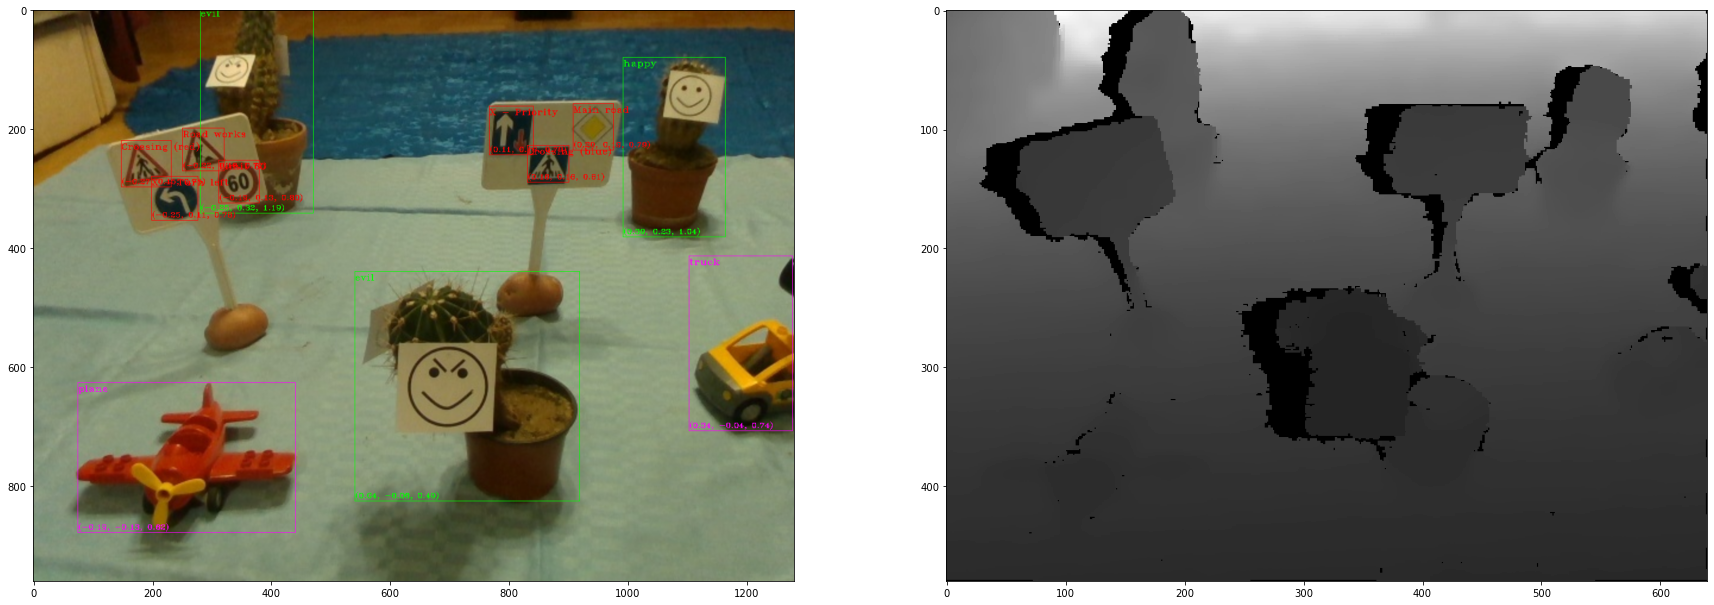

In [2]:

colors = [(0,0,255),(255,0,255),(0,255,0)]

def drawBBs(BBs, img):
    img = cv2.resize(img, (1280, 960))
    for BB in BBs:
        u = BB[0]*2
        v = BB[1]*2
        w = BB[2]*2
        h = BB[3]*2
        c = BB[4]
        sc = BB[5]
        x = BB[6]
        y = BB[7]
        z = BB[8]
        s = (u - w // 2, v - h // 2)
        e = (u + w // 2, v + h // 2)
        cv2.rectangle(img, s, e, colors[c], 1)
        tl = (s[0], s[1]+15)
        bl = (s[0], e[1]-5)
        cv2.putText(img,subclassNames[c][sc],tl,cv2.FONT_HERSHEY_COMPLEX_SMALL,0.75,colors[c])
        coords = "(%.2f, %.2f, %.2f)" % (x,y,z)
        cv2.putText(img,coords,bl,cv2.FONT_HERSHEY_COMPLEX_SMALL,0.65,colors[c])
    
    return img

import pickle
import cv2
import matplotlib.pyplot as plt
#This way it doesn't try to open a window un the GUI - works in python notebook
%matplotlib inline

# Read images
img = cv2.imread("HW/g1/rgb/1.jpg")
depth = cv2.imread("HW/g1/depth/1.png", -1)

# Read annotations
file = open('HW/annotations.pickle','rb')
annotations = pickle.load(file)

# Visualization
depth = depth / 5000.0
img = drawBBs(annotations["HW/g1/rgb/1.jpg"]["objects"], img)
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Figure with subplots
plt.figure(figsize=(30,30))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.imshow(depth,cmap='gray')

# Your Work

In [9]:
# Task 1: (traditional vision)
# BASIC: Create an algorithm to accurately detect and classify the 3 objects of interest (Cactus, Vehicle, Traffic Sign). You don't have to determine the subclass at this point.
# OUTPUT: center, width, high and type of objects / pictures

# HARDCORE: Determine the subclasses of Cacti and Vehicles
# OUTPUT: center, width, high and type of objects + subclass of cacti and vehicles / pictures

import pickle
import cv2
import numpy as np
import argparse
import time
import os
import math
#from evaluate import evaluate

font = cv2.FONT_HERSHEY_COMPLEX

################################## different edge and contour detection
def getBlurredEdges(img):
  imgEq = cv2.equalizeHist(img)
  imgBlur = cv2.GaussianBlur(imgEq, (5,5),1)
  #kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])    #élesítés
  #sharpenedImg = cv2.filter2D(imgBlur, -1, kernel)

  imgCanny = cv2.Canny(imgBlur, 50, 100)
  return imgCanny

def getSimpleEdges(img):
  imgCanny = cv2.Canny(img, 50, 100)
  return imgCanny

def getEqEdges(img):
  imgEq = cv2.equalizeHist(img)
  imgCanny = cv2.Canny(imgEq, 50, 100)
  return imgCanny

def getSharpenedEdges(img):
  kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])    #élesítés
  imgBlur = cv2.GaussianBlur(img, (5,5),1)
  sharpenedImg = cv2.filter2D(imgBlur, -1, kernel)
  imgCanny = cv2.Canny(sharpenedImg, 50, 100)
  return imgCanny

def getOnlySharpenedEdges(img):
  imgEq = cv2.equalizeHist(img)
  kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])    #élesítés
  sharpenedImg = cv2.filter2D(imgEq, -1, kernel)
  imgCanny = cv2.Canny(sharpenedImg, 100, 200)
  return imgCanny

def getOnlyBlurredEdges(img):
  imgBlur = cv2.GaussianBlur(img, (5,5),1)
  imgCanny = cv2.Canny(imgBlur, 50, 100)
  return imgCanny

def getContours(img):
  imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blurredEdges = getBlurredEdges(imgGray)
  contours=[]
  blurredContours, _ = cv2.findContours(blurredEdges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
  contours.append(blurredContours)
  simpleEdges = getSimpleEdges(imgGray)
  simpleContours, _ = cv2.findContours(simpleEdges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
  contours.append(simpleContours)
  eqEdges = getEqEdges(imgGray)
  eqContours, _ = cv2.findContours(eqEdges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
  sharpenedEdges = getSharpenedEdges(imgGray)
  sharpenedContours, _ = cv2.findContours(sharpenedEdges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
  contours.append(sharpenedContours)
  onlyBlurredEdges = getOnlyBlurredEdges(imgGray)
  onlyBlurredContours, _ = cv2.findContours(onlyBlurredEdges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
  contours.append(onlyBlurredContours)
  #onlySharpenedEdges = getOnlySharpenedEdges(imgGray)
  #onlySharpenedContours, _ = cv2.findContours(onlySharpenedEdges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
  #contours.append(onlySharpenedContours)
  print("contour test:")
  contoursAndRectangles = []
  for contourGroup in contours:        #keresés az összes kontúr típusban
    for i in range(len(contourGroup)):
      cnt = contourGroup[i]
      contourLength = cv2.arcLength(cnt, True)
      contourArea = cv2.contourArea(cnt, False)
      approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
      #x = approx.ravel()[0]
      #y = approx.ravel()[1]
      if(contourLength > 60 and len(approx)==3):
        print("tri")
        #cv2.drawContours(full_img, [approx], 0, (0, 255, 0), 2)
        #cv2.putText(full_img, "Triangle", (x, y), font, 1, (0))
      elif(contourLength > 60 and len(approx)==4):
        #x, y, w, h = cv2.boundingRect(i)
        #contoursAndRectangles.append([x,y,w,h],[cnt])
        print("rect")
        #cv2.drawContours(full_img, [approx], 0, (0, 255, 0), 2)
        #cv2.putText(full_img, "Rectangle", (x, y), font, 1, (0))
      elif(contourLength > 60 and  contourArea> (contourLength**2 / (4*3.14) *0.5) and len(approx)==5 ):
        x, y, w, h = cv2.boundingRect(cnt)
        contoursAndRectangles.append([[x,y,w,h],[cnt],[approx], "Pentagon"])

      elif(contourLength > 60 and  contourArea> (contourLength**2 / (4*3.14) *0.5) and 6<=len(approx)<15):
        x, y, w, h = cv2.boundingRect(cnt)
        contoursAndRectangles.append([[x,y,w,h],[cnt],[approx], "Ellipse"])
      elif(contourLength > 60 and  contourArea> (contourLength**2 / (4*3.14) *0.5)):
        x, y, w, h = cv2.boundingRect(cnt)
        contoursAndRectangles.append([[x,y,w,h],[cnt],[approx], "Circle"])

  drawnContours = []


  for i in range(len(contoursAndRectangles)):
    checkIfLargerRect(contoursAndRectangles, i)


  for i in range(len(contoursAndRectangles)):
    if contoursAndRectangles[i][0] == [0, 0, 0, 0]: continue
    drawnContours.append(contoursAndRectangles[i])
    cv2.rectangle(img, (contoursAndRectangles[i][0][0], contoursAndRectangles[i][0][1]), 
    (contoursAndRectangles[i][0][0]+contoursAndRectangles[i][0][2], contoursAndRectangles[i][0][1]+contoursAndRectangles[i][0][3]), (0,255,0),1)
    #cv2.drawContours(img, contoursAndRectangles[i][2], 0, (0, 255, 0), 2)
    cv2.putText(img, contoursAndRectangles[i][3], (x, y), font, 1, (0))


  return onlyBlurredEdges, contoursAndRectangles


#a kisebb intersection-nel tér vissza
def getIntersectionPercent(rect1, rect2):
  if((rect1[2] * rect1[3]) == 0 or (rect2[2] * rect2[3]) == 0):
    return 0
  [x,y,w,h] = getIntersection(rect1, rect2)
  percent1 = ((w*h) / (rect1[2] * rect1[3])) *100
  percent2 = ((w*h) /(rect2[2] * rect2[3])) *100
  if(percent1>percent2): 
    return percent2
  else:
    return percent1


def getIntersection(rect1, rect2):
  x = max(rect1[0], rect2[0])
  y = max(rect1[1], rect2[1])
  w = min(rect1[0]+rect1[2], rect2[0]+rect2[2])-x
  h = min(rect1[1]+rect1[3], rect2[1]+rect2[3])-y
  if w<0 or h<0: return (0,0,0,0)
  return(x,y,w,h)


#ellenőrzi, hogy van-e olyan négyzet, ami tartalmazza ezt a négyzetet
#cél: a legnagyobb wrapper négyzet megtalálása
def checkIfLargerRect(contourAndRectangleList, pos):
  rectParams = contourAndRectangleList[pos][0]
  retval = False
  for i in range(len(contourAndRectangleList)):
    if(i == pos) or (contourAndRectangleList[i][0] == [0, 0, 0, 0]): continue
    if(contourAndRectangleList[i][0][0]==rectParams[0] and contourAndRectangleList[i][0][1]==rectParams[1] and 
      (contourAndRectangleList[i][0][0]+contourAndRectangleList[i][0][2]) ==(rectParams[0]+rectParams[2]) and
      (contourAndRectangleList[i][0][1]+contourAndRectangleList[i][0][3]) ==(rectParams[1]+rectParams[3])):
      contourAndRectangleList[i][0] = [0,0,0,0]
      retval = False
    elif(contourAndRectangleList[i][0][0]<=rectParams[0] and contourAndRectangleList[i][0][1]<=rectParams[1] and 
      (contourAndRectangleList[i][0][0]+contourAndRectangleList[i][0][2]) >=(rectParams[0]+rectParams[2]) and
      (contourAndRectangleList[i][0][1]+contourAndRectangleList[i][0][3]) >=(rectParams[1]+rectParams[3])):
      contourAndRectangleList[pos][0] = [0,0,0,0] 
      retval = True

    elif(getIntersectionPercent(rectParams, [contourAndRectangleList[i][0][0], 
    contourAndRectangleList[i][0][1], contourAndRectangleList[i][0][2], contourAndRectangleList[i][0][3]]) > 80):  #overlapping négyzet eltávolítása, ha esetleg van
      contourAndRectangleList[i][0] = [0,0,0,0] #másik négyzet eltávolítása
      retval = False
  return retval



#transform color 
def colorTransform(img):
  imgValMean = cv2.mean(img)

  print("img color val means: ")
  print(imgValMean)

  millis = int(round(time.time() * 1000))
  print(millis)
  
  image_data = np.asarray(img)
  selectorCheck = np.zeros((480, 640))     #mutatja, hogy mi alapján végzek szín szűrést
  greenInHighBlue = 0  #sok kéket tartalmazó színben szereplő zöld
  redInHighBlue = 0    #sok kéket tartalmazó színben szereplő piros
  blueInHighBlue = 0
  highBluePixels = 0   #sok kéket tartalmazó pixelek száma
  print("image data test:")
  print(len(image_data[0]))
  for i in range(len(image_data)):
    for j in range(len(image_data[0])):
      pixel = image_data[i][j] 
      if(pixel[0]>imgValMean[0]*1.3 and pixel[2]>imgValMean[0]*0.5):
        blueInHighBlue += pixel[0]
        greenInHighBlue += pixel[1]
        redInHighBlue += pixel[2]
        highBluePixels += 1
        selectorCheck[i][j] = 255
  
  greenInHighBlue = greenInHighBlue/highBluePixels
  redInHighBlue = redInHighBlue/highBluePixels
  blueInHighBlue = blueInHighBlue/highBluePixels

  print("blue in high blue:")
  print(blueInHighBlue)
  print("green in high blue:")
  print(greenInHighBlue)
  print("red in high blue:")
  print(redInHighBlue)


  multGreen = 200/greenInHighBlue
  multRed = 150/redInHighBlue
  multBlue = 150/blueInHighBlue


  ##itt beállítom a képet, ezt nem feltétlenül fogom megtenni, az éles alaklmazásban csak a színkeresési feltételeket transzformálom, most viszont jól jön
  for i in range(0,img.shape[0]):       #ez már nem annyira nagyonlassú
    for j in range(0,img.shape[1]):
      pixelBlue = img.item(i, j, 0)
      pixelGreen = img.item(i, j, 1)
      pixelRed = img.item(i, j, 2)
      img.itemset((i, j, 1), min(pixelGreen*multGreen, 255))
      img.itemset((i, j, 2), min(pixelRed*multRed, 255))
      img.itemset((i, j, 0), min(pixelBlue*multBlue, 255))


  millis = int(round(time.time() * 1000))
  imgValMean = cv2.mean(img)
  print("modified picture means: ")
  print(imgValMean)

  #cv2.imwrite( "./modImg/img1.jpg", img );
  return img

def getWhiteThings(baseImg): 
  ######## táblák és fejek
  baseImg_hsv = cv2.cvtColor(baseImg, cv2.COLOR_BGR2HSV)
  kernel = np.ones((5,5),np.uint8)
  hsv_color1 = np.asarray([0, 0, 101])   
  hsv_color2 = np.asarray([70, 137, 255])   

  #hsv_color3 = 

  white_things = cv2.inRange(baseImg_hsv, hsv_color1, hsv_color2)


  
  w_t_opened = cv2.morphologyEx(white_things, cv2.MORPH_OPEN, kernel, iterations=1)
  w_t_closed = cv2.morphologyEx(w_t_opened, cv2.MORPH_CLOSE, kernel, iterations=3)

  return white_things

def getWhiteThings2(baseImg): 
  ######## táblák és fejek
  baseImg_hsv = cv2.cvtColor(baseImg, cv2.COLOR_BGR2HSV)
  kernel = np.ones((5,5),np.uint8)
  hsv_color1 = np.asarray([0, 0, 101])   
  hsv_color2 = np.asarray([255, 137, 255])   

  #hsv_color3 = 

  white_things = cv2.inRange(baseImg_hsv, hsv_color1, hsv_color2)

  w_t_opened = cv2.morphologyEx(white_things, cv2.MORPH_OPEN, kernel, iterations=1)
  w_t_closed = cv2.morphologyEx(w_t_opened, cv2.MORPH_CLOSE, kernel, iterations=3)

  return white_things
  


def analyzeContours(contoursAndRectangles, whiteThings, baseImg):
  things = np.zeros((480,640,1), np.uint8)
  infos = np.zeros((480,640,1), np.uint8)
  cactiRectangles = []
  trafficSignRectangles = []
  for i in contoursAndRectangles:
    if(i[0] != [0, 0, 0, 0]):
      contour = i[1]
      thisThing = np.zeros((480,640,1), np.uint8)

      cv2.drawContours(things, contour, 0, (255,255,255), -1)

      cv2.drawContours(thisThing, contour, 0, (255,255,255), -1)
      selectedThing = cv2.bitwise_and(whiteThings, whiteThings, mask = thisThing)
      avg = cv2.mean(selectedThing, mask=thisThing)
      if(avg[0] > 197):
        #szóval ez egy kaktuszfej
        x1, y1, x2, y2 = calculateCactiWrapper(i[0])
        cactiRectangles.append({
          "cactiHead": i[0],
          "cactiHeadContour": contour,
          "cactiWrapper": [x1,y1,x2,y2]
        })
        cv2.rectangle(baseImg, (x1, y1), (x2, y2), (0,0,255),1)
      elif(avg[0] > 20):
        #szóval ez egy tábla
        x1 = i[0][0]
        y1 = i[0][1]
        x2 = i[0][0]+i[0][2]
        y2 = i[0][1]+i[0][3]
        trafficSignRectangles.append([x1, y1, x2, y2])
        cv2.rectangle(baseImg, (x1, y1), (x2, y2), (255,0,0),1)
      cv2.putText(infos, str(avg), (i[0][0], i[0][1]), font, 1, (255))    #i[0][0] és i[0][1] x és y

  res = cv2.bitwise_and(whiteThings, whiteThings, mask = things)
  return res, infos, cactiRectangles, trafficSignRectangles



def calculateDistance(x1, y1, x2, y2):
  return math.sqrt((x1-x2)**2+(y1-y2)**2)


#a feladata, hogy a detektált objektumokat tovább szűrje, hogy a hibákat eltávolítsa
def postProcessObjects(cactis, trafficSigns, vehicles):
  print("asd")

  ###### kaktuszok átnézése, a kicsi fejek, és a hátoldali fej detektálás kiszűrése
  smallHeadsRemoved = []

  for i in cactis:
    if(i["cactiHead"][3]>20):
      smallHeadsRemoved.append(i)

  headsOnBackRemoved = []
  if(len(smallHeadsRemoved) == 1):
    headsOnBackRemoved.append(i)
  else:
    for i in smallHeadsRemoved:
      isItAWrongHead = False
      for j in smallHeadsRemoved:
        distance = calculateDistance(i["cactiHead"][0], i["cactiHead"][1], j["cactiHead"][0], j["cactiHead"][1])
        if(distance < 150):
          area_i = i["cactiHead"][2] * i["cactiHead"][3]
          area_j = j["cactiHead"][2] * j["cactiHead"][3]
          if(area_i < area_j):  #ha ez feltételezhetően nem egy jó fej
            isItAWrongHead = True
      if(not isItAWrongHead):
        headsOnBackRemoved.append(i)


  ##összes suv, és összes plane kiválogatása
  SUVs = []
  planes = []
  trucks = []

  for i in vehicles:
    if(i["type"] == "SUV" or i["type"] == "plane"): #meg kell nézni, hogy milyen közel van a kaktuszhoz, mivel lehet, hogy cserép
      print("DISTANCE TEST:")
      isVehicle = True
      for j in headsOnBackRemoved:
        cactiHeadMid_x = j["cactiHead"][0] + j["cactiHead"][2]/2
        cactiHeadMid_y = j["cactiHead"][1] + j["cactiHead"][3]/2
        SUVMid_x = (i["rect"][0] + i["rect"][2]) / 2
        SUVMid_y = (i["rect"][1] + i["rect"][3]) / 2
        distance = calculateDistance(cactiHeadMid_x, cactiHeadMid_y, SUVMid_x, SUVMid_y)
        print(distance)
        if distance < 100:
          isVehicle = False
      if isVehicle:
        if(i["type"]== "plane"):
          planes.append(i)
        elif(i["type"]== "SUV"):
          SUVs.append(i)
    elif(i["type"] == "truck"):
      trucks.append(i)
    
  if(len(SUVs)>1):
    realSUV = {}
    maxContourLength = 0
    for i in SUVs:
      if i["contourLength"] > maxContourLength:
        realSUV = i
        maxContourLength = i["contourLength"]
    SUVs = []
    SUVs.append(realSUV)
  
  if(len(trucks) > 1):
    realTruck = {}
    maxContourLength = 0
    for i in trucks:
      if i["contourLength"] > maxContourLength:
        realTruck = i
        maxContourLength = i["contourLength"]
    trucks = []
    trucks.append(realTruck)

  #a darut ne érzékelje plane-nek
  if(len(planes)>0):
    newPlanes = []
    for i in planes: 
      if(len(trucks) >0):
        truckMid_x = (trucks[0]["rect"][0] + trucks[0]["rect"][2]) / 2
        truckMid_y = (trucks[0]["rect"][1] + trucks[0]["rect"][3]) / 2
        planeMid_x = (i["rect"][0] +i["rect"][2]) / 2
        planeMid_y = (i["rect"][1] + i["rect"][3]) / 2
        distance = calculateDistance(truckMid_x, truckMid_y, planeMid_x, planeMid_y)
        if(distance<50):  #ha túl közel van, a truck-hoz, akkor ez egy daru, continue
          continue
      newPlanes.append(i)
    planes = newPlanes
  
  if(len(planes) > 1):
    realPlane = {}
    maxContourLength = 0
    for i in planes:
      if i["contourLength"] > maxContourLength:
        realPlane = i
        maxContourLength = i["contourLength"]
    planes = []
    planes.append(realPlane)

#################################### csak a wrapper visszaadása
  newCactis = []
  newVehicles = [] #egylőre teszt, itt majd benne lesz a típus is
  for i in headsOnBackRemoved:
    #newCactis.append(i["cactiWrapper"])
    newCactis.append(i)
  for i in planes:
    newVehicles.append({
      "type": 2,
      "rect":i["rect"]
    })
  for i in SUVs:
    newVehicles.append({
      "type": 0,
      "rect":i["rect"]
    })
  for i in trucks:
    newVehicles.append({
      "type": 1,
      "rect":i["rect"]
    })
  return newCactis, trafficSigns, newVehicles


def calculateCactiWrapper(cactiHeadWrapper):
  x1 = max(cactiHeadWrapper[0] - 20, 0)
  y1 = max(cactiHeadWrapper[1] - 20, 0)
  x2 = min(cactiHeadWrapper[0]+cactiHeadWrapper[2] + 20, 640)
  y2 = min(cactiHeadWrapper[1]+cactiHeadWrapper[3] + 100, 480)
  return [x1, y1, x2, y2]

def detectVehicles(img):
  vehicleList = []
  img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  cv2.rectangle(img_hsv,(0,0),(640,160),(0,0,0),-1) #a felső 1/3 fekete
  hsv_color1 = np.asarray([0, 155, 59])   
  hsv_color2= np.asarray([10, 255, 255])   
  plane = cv2.inRange(img_hsv, hsv_color1, hsv_color2)

  _, th = cv2.threshold(plane, thresh=10, maxval=255, type=cv2.THRESH_BINARY)
  kernel = np.ones((5,5),np.uint8)
  th_opened = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel, iterations=2)

  contours, hierarchy = cv2.findContours(th_opened, 1, 2)
  for cnt in contours:
    contourLength = cv2.arcLength(cnt, True)
    if contourLength>200:
      contourArea = cv2.contourArea(cnt, False)
      print(">>> Vehicle contour test:")
      print(contourLength)
      print(contourArea)
      
      areaPerLength = contourArea / contourLength
      print("contour area per length "+str(areaPerLength))
      x,y,w,h = cv2.boundingRect(cnt)
      boundingRectArea = w*h
      areaPerBoundingRectArea = contourArea / boundingRectArea
      print("areaPerBoundingRectArea"+str(areaPerBoundingRectArea))
      if(areaPerLength >7.5 and areaPerBoundingRectArea > 0.48 and contourArea>2500):  #! ez egy SUV
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
        vehicleList.append({
          "contourLength" : contourLength,
          "type": "SUV",
          "rect":[x,y,x+w,y+h]
        })
        text = "SUV" + str(areaPerLength)
        cv2.putText(img, text, (x, y), font, 1, (0,0,255))
      elif (areaPerLength>6 and areaPerBoundingRectArea < 0.48): #!ez egy plane
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
        vehicleList.append({
          "contourLength" : contourLength,
          "type": "plane",
          "rect":[x,y,x+w,y+h]
        })
        text = "Plane" + str(areaPerLength)
        cv2.putText(img, text, (x, y), font, 1, (0,0,255))
      else:
        text = str(areaPerLength) 
        cv2.putText(img, text, (x, y), font, 1, (0,0,255))
      cv2.drawContours(img, [cnt], 0, (0,255,0), 2)

  
  hsv_color1 = np.asarray([13, 183, 134])   
  hsv_color2= np.asarray([29, 255, 255])   
  truck = cv2.inRange(img_hsv, hsv_color1, hsv_color2)
  
  _, th = cv2.threshold(truck, thresh=10, maxval=255, type=cv2.THRESH_BINARY)
  kernel = np.ones((5,5),np.uint8)
  th_opened = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel, iterations=2)
  contours, hierarchy = cv2.findContours(th_opened, 1, 2) 

  for cnt in contours:
    contourLength = cv2.arcLength(cnt, True) 
    contourArea = cv2.contourArea(cnt, False) 
    if contourLength>200 and contourArea>1500 and contourArea<6000: #legyen kisebb mint 6k?
      print("truck contour area:")
      print(contourArea)
      x,y,w,h = cv2.boundingRect(cnt)
      cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
      vehicleList.append({
        "contourLength" : contourLength,
        "type": "truck",
        "rect":[x,y,x+w,y+h]
      })
      cv2.putText(img, "Truck", (x, y), font, 1, (0,0,255))
  return th_opened, vehicleList



def getClosedArcLength(curve): 
  return cv2.arcLength(curve, True)

def isContainsPoint(point_x, point_y, rect):
  if (point_x >= rect[0] and point_x <= (rect[0]+rect[2])) and (point_y >= rect[1] and point_y <=rect[1]+rect[3]):
    print("_________found a collision:")
    print("this contains: ")
    print(rect)
    print("this point:")
    print([point_x , point_y])
    return True
  else:
    return False

def analyzeFaces(cactis, faceImg):
  allFaces = np.zeros((480,640,1), np.uint8)
  grayImg = cv2.cvtColor(faceImg, cv2.COLOR_BGR2GRAY)
  newCactis = []    #ebben benne lesz a típus is
  for cacti in cactis:
    faceMask = np.zeros((480,640,1), np.uint8)
    cv2.drawContours(faceMask, cacti["cactiHeadContour"], 0, (255,255,255), -1)
    #esetleg hist eq
    #itt még a feldolgozást ki kell találni
    avg = cv2.mean(grayImg, mask=faceMask)
    thresholdVal = avg[0]*0.9 #ki kell találni, hogy mi legyen
    selectedFace = cv2.bitwise_and(grayImg, grayImg, mask = faceMask)
    #cv2.equalizeHist(img)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])    #élesítés
    sharpenedFace = cv2.filter2D(selectedFace, -1, kernel)

    _, th = cv2.threshold(sharpenedFace, thresh=thresholdVal, maxval=255, type=cv2.THRESH_BINARY)

    th_inv = 255 - th
    #kernel = np.ones((3,3),np.uint8)
    #th_closed = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel, iterations=1)
    #inv_th = 255 - th
    #blur = cv2.medianBlur(inv_th, 3)
    #th = 255-blur

    cnt, hierarchy = cv2.findContours(th_inv, 1 ,2)
    sortedContours = sorted(cnt, key = lambda x:cv2.arcLength(x, True))
    contourToShow = sortedContours[-1]
    #cv2.drawContours(faceImg, [contourToShow], 0, (255, 0, 0), 1)
    maskedMouthTest = np.zeros((480,640,1), np.uint8)
    isSmile = False
    for i in reversed(sortedContours):  #cél, hogy megtalálja a szájat
      contourLength = cv2.arcLength(i, True)
      contourArea = cv2.contourArea(i, False)
      if(contourLength > 40 and contourArea<150 and contourLength<150):   #a száj megkeresése, ez többnyire jó
        cv2.drawContours(faceImg, [i], 0, (255, 0, 0), 1)
        print("contour length:")
        print(contourLength)
        print("contour area:")
        print(contourArea)
        x, y, w, h = cv2.boundingRect(i)
        ##! tesztelni kell, hogy mit tekint mouth-nak
        test_mask = np.zeros((480,640,1), np.uint8)
        cv2.rectangle(test_mask, (x,y), (x+w, y+h), (255, 255, 255), -1)
        maskedMouthTest = cv2.bitwise_and(th, th, mask=test_mask)

        mouth = th[y:y+h, x:x+w]
        if(w>15 and h>=5):
          subArray1 = mouth[0:5, 0:5]
          subArray2 = mouth[0:5, w-5:w]
          unique, counts = np.unique(subArray1, return_counts=True)
          for index, val in enumerate(unique):
            if(val == 0):
              if(counts[index] > 5):
                print("count index test:")
                print(counts[index])
                isSmile = True
          unique, counts = np.unique(subArray2, return_counts=True)
          for index, val in enumerate(unique):
            if(val == 0):
              if(counts[index] > 5):
                print("count index test:")
                print(counts[index])
                isSmile = True
        break
      else:   #ha nem talált szájat (ilyenkor van, hogy beleér az aljába, tehát sad)
        isSmile = False
    
    print("is smile?")
    print(isSmile)
    allFaces = cv2.bitwise_or(allFaces, th)

    #TODO szemöldök detektálás
    faceFeatureWrappers = []
    isIntersectDetected = False
    for i in sortedContours:
      if(cv2.arcLength(i, True)>6 and cv2.arcLength(i, True)<40): 
        x, y, w, h = cv2.boundingRect(i)
        faceFeatureWrappers.append([x,y,w,h])
    for i in range(len(faceFeatureWrappers)):     #megnézi, hogy az i négyzetben benne van-e a j négyzet valamelyik sarka
      if isIntersectDetected: break
      for j in range (len(faceFeatureWrappers)):
        if(i == j): continue
        if isIntersectDetected: break 
        p = faceFeatureWrappers[j]
        points = [[p[0], p[1]], [p[0]+p[2], p[1]], [p[0]+p[2], p[1]+p[3]], [p[0], p[1]+p[3]]]
        for k in points:
          if isContainsPoint(k[0], k[1], faceFeatureWrappers[i]):
            isIntersectDetected = True
            break
        #if(isContainsPoint)
        #print(i & j)
    print("has eyebrows? : ")
    print(isIntersectDetected)

    ##################################### kiértékelés
    cactiType = 0
    if(isSmile and isIntersectDetected):
      print("It is evil")
      cactiType = 3
    elif(isSmile and not isIntersectDetected):
      print("It is happy :)")
      cactiType = 0
    elif(not isSmile and not isIntersectDetected):
      print("It is sad :(")
      cactiType = 1
    elif(not isSmile and isIntersectDetected):
      print("It is angry")
      cactiType = 2

    newCacti = cacti
    cacti["type"] = cactiType
    newCactis.append(cacti)

  #kaktusz for ciklus vége
  #faceImg = cv2.bitwise_and(faceImg, faceImg, mask = faceMask)
  return newCactis, allFaces




def createMyAnswers():
  myAnswers = {}
  for subdir, dirs,  files in os.walk("./HW"):
    for file in files:
      filepath = subdir + os.sep + file
      if(subdir[-3:] == "rgb"):
        print("dir test:")
        print(subdir[-6:-4])
        baseImg = cv2.imread(filepath)
        baseImgCpy = baseImg.copy()
        baseImgCpy2 = baseImg.copy()
        cactiFaceImg = baseImg.copy()
        objectContours, contoursAndRectangles = getContours(baseImg)
        #modColor = colorTransform(baseImgCpy)
        whiteThings = getWhiteThings2(baseImgCpy)
        res, infos, cactis, trafficSigns = analyzeContours(contoursAndRectangles, whiteThings, baseImgCpy)
        test, vehicles = detectVehicles(baseImgCpy2)


        cactis, trafficSigns, vehicles = postProcessObjects(cactis, trafficSigns, vehicles)
        cactis, _ = analyzeFaces(cactis, cactiFaceImg)
        
        myObjects = []
        for i in cactis:
          u = (i["cactiWrapper"][0]+i["cactiWrapper"][2])//2
          v = (i["cactiWrapper"][1]+i["cactiWrapper"][3])//2
          w = i["cactiWrapper"][2] - i["cactiWrapper"][0]
          h = i["cactiWrapper"][3] - i["cactiWrapper"][1] 
          myObject = [u, v, w, h, 2, i["type"], 0, 0, 0]
          myObjects.append(myObject)

        for i in trafficSigns:
          u = (i[0]+i[2])//2
          v = (i[1]+i[3])//2
          w = i[2] - i[0]
          h = i[3] - i[1] 
          myObject = [u, v, w, h, 0, 0, 0, 0, 0]
          myObjects.append(myObject)

        for i in vehicles:
          u = (i["rect"][0]+i["rect"][2])//2
          v = (i["rect"][1]+i["rect"][3])//2
          w = i["rect"][2] - i["rect"][0]
          h = i["rect"][3] - i["rect"][1] 
          myObject = [u, v, w, h, 1, i["type"], 0, 0, 0]
          myObjects.append(myObject)

        pose = [[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]]  
        myPred = {
           'poses' :[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
           'objects' : myObjects
        }
        myAnswers['HW/'+subdir[-6:-4]+'/rgb/'+file]  = myPred
  return myAnswers



#################################################### MAIN ####################################################
#testOnSingleImg()

###### Answer and evaluation ######
myAnswers = createMyAnswers()
print("task 1 finished")
print(myAnswers)
#evaluate(myAnswers)

#filehandler = open(b"my_answer.pickle","wb")
#pickle.dump(myAnswers,filehandler)






dir test:
g1
contour test:
rect
rect
rect
rect
rect
rect
rect
rect
rect
rect
rect
rect
>>> Vehicle contour test:
666.9188274145126
5656.5
contour area per length 8.481541932065285
areaPerBoundingRectArea0.312220566318927
truck contour area:
2757.0
asd
DISTANCE TEST:
226.09787703558828
519.1208915079416
315.23840184850576
contour length:
113.78174436092377
contour area:
86.5
count index test:
12
count index test:
11
is smile?
True
_________found a collision:
this contains: 
[335, 347, 4, 3]
this point:
[336, 349]
has eyebrows? : 
True
It is evil
contour length:
59.59797918796539
contour area:
18.0
count index test:
11
count index test:
9
is smile?
True
has eyebrows? : 
False
It is happy :)
contour length:
40.627416372299194
contour area:
9.0
count index test:
8
count index test:
7
is smile?
True
_________found a collision:
this contains: 
[174, 68, 4, 3]
this point:
[177, 69]
has eyebrows? : 
True
It is evil
dir test:
g1
contour test:
rect
rect
rect
rect
rect
rect
rect
rect
rect
rect
>>

contour test:
rect
rect
rect
rect
rect
rect
rect
rect
rect
rect
>>> Vehicle contour test:
231.39696848392487
1983.0
contour area per length 8.569688760368349
areaPerBoundingRectArea0.5371072589382448
>>> Vehicle contour test:
244.08326017856598
495.0
contour area per length 2.0279965108539963
areaPerBoundingRectArea0.2535860655737705
truck contour area:
3704.0
asd
contour length:
47.94112515449524
contour area:
12.0
count index test:
9
count index test:
8
is smile?
True
has eyebrows? : 
False
It is happy :)
dir test:
g1
contour test:
rect
rect
rect
rect
rect
rect
tri
rect
rect
rect
>>> Vehicle contour test:
217.01219260692596
1205.5
contour area per length 5.554987420377441
areaPerBoundingRectArea0.4672480620155039
>>> Vehicle contour test:
370.99494755268097
1862.0
contour area per length 5.01893627469306
areaPerBoundingRectArea0.3221453287197232
truck contour area:
3499.0
asd
contour length:
114.1248916387558
contour area:
77.5
count index test:
15
is smile?
True
_________found a col

contour test:
rect
rect
rect
rect
rect
rect
tri
rect
rect
rect
>>> Vehicle contour test:
523.4802286624908
4556.0
contour area per length 8.703289542836659
areaPerBoundingRectArea0.551440329218107
truck contour area:
4221.0
asd
DISTANCE TEST:
422.2256505708766
181.20775369724112
252.14479966876175
is smile?
False
has eyebrows? : 
False
It is sad :(
contour length:
109.29646337032318
contour area:
80.5
count index test:
9
count index test:
12
is smile?
True
_________found a collision:
this contains: 
[362, 242, 4, 3]
this point:
[364, 243]
has eyebrows? : 
True
It is evil
contour length:
103.49747371673584
contour area:
103.5
count index test:
17
is smile?
True
_________found a collision:
this contains: 
[534, 100, 5, 5]
this point:
[537, 103]
has eyebrows? : 
True
It is evil
dir test:
g2
contour test:
rect
rect
rect
rect
tri
rect
rect
rect
rect
rect
rect
rect
rect
rect
rect
rect
rect
rect
rect
rect
rect
rect
rect
>>> Vehicle contour test:
540.4507907629013
8602.0
contour area per lengt

contour test:
rect
>>> Vehicle contour test:
281.1959580183029
3813.0
contour area per length 13.559938865663971
areaPerBoundingRectArea0.7140449438202248
asd
DISTANCE TEST:
228.96287908741888
151.32250328355
is smile?
False
_________found a collision:
this contains: 
[383, 106, 3, 3]
this point:
[384, 108]
has eyebrows? : 
True
It is angry
contour length:
91.15432798862457
contour area:
76.5
count index test:
14
is smile?
True
_________found a collision:
this contains: 
[211, 226, 3, 4]
this point:
[213, 228]
has eyebrows? : 
True
It is evil
dir test:
g2
contour test:
rect
rect
rect
>>> Vehicle contour test:
270.71067678928375
3373.0
contour area per length 12.45979670992246
areaPerBoundingRectArea0.752565818830879
asd
DISTANCE TEST:
147.92734703225094
218.52459815773602
77.43545699484184
291.2631971258985
contour length:
94.18376553058624
contour area:
93.5
count index test:
12
count index test:
21
is smile?
True
_________found a collision:
this contains: 
[144, 237, 3, 4]
this point

areaPerBoundingRectArea0.15006105006105006
>>> Vehicle contour test:
453.5807341337204
8322.5
contour area per length 18.348442457316626
areaPerBoundingRectArea0.7174568965517242
asd
DISTANCE TEST:
550.4009901880628
253.78780506557047
451.97040832337683
DISTANCE TEST:
273.9498129220022
342.3448553724738
281.23388842740843
contour length:
146.16652083396912
contour area:
108.0
count index test:
13
is smile?
True
_________found a collision:
this contains: 
[67, 325, 4, 3]
this point:
[69, 327]
has eyebrows? : 
True
It is evil
contour length:
71.11269783973694
contour area:
70.0
count index test:
25
count index test:
16
is smile?
True
_________found a collision:
this contains: 
[576, 177, 3, 4]
this point:
[577, 179]
has eyebrows? : 
True
It is evil
contour length:
68.66904723644257
contour area:
28.5
is smile?
False
has eyebrows? : 
False
It is sad :(
dir test:
g3
contour test:
tri
rect
rect
rect
rect
>>> Vehicle contour test:
311.4385986328125
2314.5
contour area per length 7.4316414540

True
It is evil
contour length:
40.14213538169861
contour area:
37.0
count index test:
21
count index test:
19
is smile?
True
_________found a collision:
this contains: 
[592, 174, 2, 3]
this point:
[594, 176]
has eyebrows? : 
True
It is evil
is smile?
False
has eyebrows? : 
False
It is sad :(
dir test:
g3
contour test:
rect
rect
rect
rect
rect
rect
rect
rect
>>> Vehicle contour test:
369.53910398483276
5860.0
contour area per length 15.857591082540797
areaPerBoundingRectArea0.6659090909090909
>>> Vehicle contour test:
580.6761860847473
7682.0
contour area per length 13.229404243002387
areaPerBoundingRectArea0.4767578973499659
asd
DISTANCE TEST:
215.8384812770883
278.2647120998277
460.63922976663633
DISTANCE TEST:
158.89383247942635
390.65489885575477
291.97260145431454
contour length:
111.05382204055786
contour area:
118.0
is smile?
False
_________found a collision:
this contains: 
[238, 379, 4, 3]
this point:
[240, 381]
has eyebrows? : 
True
It is angry
is smile?
False
_________found

truck contour area:
2107.5
asd
contour length:
100.4680358171463
contour area:
56.5
is smile?
False
_________found a collision:
this contains: 
[479, 306, 4, 3]
this point:
[481, 308]
has eyebrows? : 
True
It is angry
contour length:
72.66904711723328
contour area:
37.5
count index test:
12
is smile?
True
has eyebrows? : 
False
It is happy :)
contour length:
66.52691149711609
contour area:
64.5
count index test:
15
is smile?
True
_________found a collision:
this contains: 
[245, 111, 3, 4]
this point:
[247, 113]
has eyebrows? : 
True
It is evil
dir test:
g4
contour test:
rect
rect
rect
rect
rect
rect
rect
rect
rect
rect
rect
rect
rect
tri
rect
rect
rect
>>> Vehicle contour test:
289.9238797426224
4705.5
contour area per length 16.230122210620493
areaPerBoundingRectArea0.7440702087286527
>>> Vehicle contour test:
569.3208482265472
6983.5
contour area per length 12.266369696022599
areaPerBoundingRectArea0.4388826043237808
>>> Vehicle contour test:
293.4385986328125
1212.5
contour area pe

rect
rect
rect
rect
rect
rect
rect
rect
>>> Vehicle contour test:
247.53910398483276
2641.0
contour area per length 10.669021409085408
areaPerBoundingRectArea0.64873495455662
>>> Vehicle contour test:
448.7523069381714
5166.5
contour area per length 11.513032735699863
areaPerBoundingRectArea0.5426995798319327
>>> Vehicle contour test:
215.43859839439392
2986.5
contour area per length 13.862418444315844
areaPerBoundingRectArea0.7511317907444668
>>> Vehicle contour test:
314.16652035713196
2730.0
contour area per length 8.689659219246675
areaPerBoundingRectArea0.5223880597014925
asd
DISTANCE TEST:
104.01081674518281
394.2121890555897
298.328677803526
DISTANCE TEST:
268.79360111431225
536.0457070064082
272.77692351076917
DISTANCE TEST:
302.4508224488735
158.70885293517813
451.47120616934143
DISTANCE TEST:
167.70509831248424
351.98011307458836
90.16789894413644
contour length:
130.61017227172852
contour area:
106.5
is smile?
False
_________found a collision:
this contains: 
[321, 368, 4, 3

In [0]:
# Task 2: (deep learning)
# BASIC: Use a deep learning algorithm to classify traffic signs. The package provided includes a training and validation database of 32x32 RGB images.
# OUTPUT: traffic signs / pictures (without 3 missing)

# HARDCORE: Of the 55 possible traffic signs, 3 are missing from the training and test datasets. ('X - Priority', 'X - Turn left', 'X - Turn right') 
# As a result, the neural net trained in task 2 will not be able to classify them properly. Extend your neural network to classify these as well.
# OUTPUT: traffic signs / pictures (all)


In [0]:
# Task 3: (3d vision)
# BASIC: 3D Vision: Determine the 3D positions of the object of interest relative to the camera. Use the center of an object's bounding box to determine the position on the image.
# OUTPUT: x,y and z coordinates (cm) of objects / pictures

# HARDCORE: Determine the absolute pose (4x4 transformation matrix) of the camera as it moves throughout the video.
# You can safely assume that the pose in the first frame of every video is the identity matrix.
#OUTPUT: transformation matrixes of the CAMERA / pictures


# Evaluation

This snippet assumes that the contents of the downloaded zip file are in the HW folder, and that your predictions are in a dictionary called predictions that adheres to the format specified above

In [12]:
from HW.evaluate import evaluate

evaluate(myAnswers)

Task 1: 0.8173599701269605
Task 1 HC: 0.5140449438202247
Task 2: 0.0
Task 2 HC: 0.0
Task 3: 0.014602107546309735
Task 3 HC: 0.8953936496117585
Total:  2.241400671105253
